In [3]:
import scanpy as sc
import pandas as pd

In [21]:
adata = sc.read("/Users/dominik.klein/data/pancreas_multiome_2022_processed.h5ad")

In [22]:
adata = adata[:, adata.var["modality"]=="GEX"].copy()

In [23]:
new_annotations = pd.read_csv("/Users/dominik.klein/paper_writing/moscot/endocrine_refinement.csv")
new_annotations.set_index(keys='Unnamed: 0' ,inplace=True)

In [24]:
adata.obs = adata.obs.merge(new_annotations, left_index=True, right_index=True)

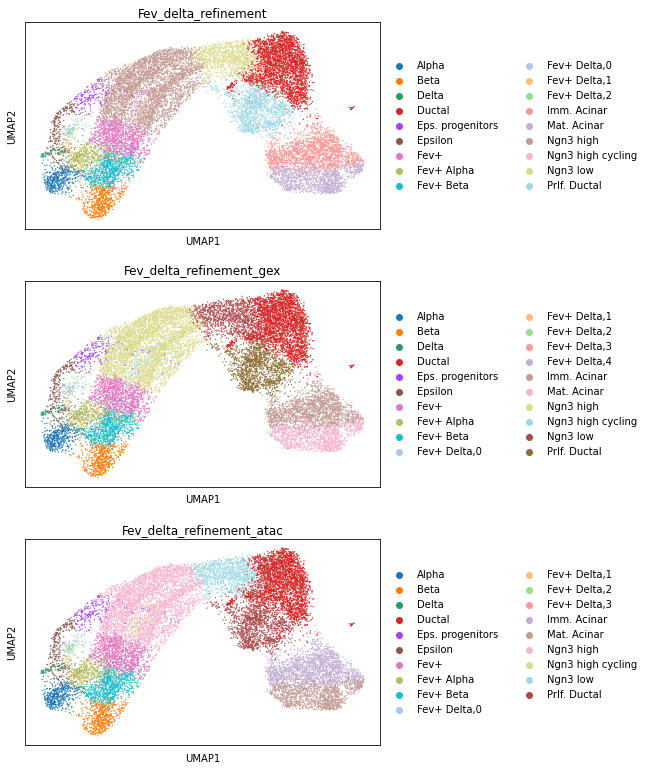

In [25]:
sc.pl.umap(adata, color=["Fev_delta_refinement", "Fev_delta_refinement_gex", "Fev_delta_refinement_atac"], ncols=1)

In [26]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [28]:
adata = adata[adata.obs["celltype"].isin(["Fev+ Delta", "Eps. progenitors", "Delta", "Epsilon"])].copy()

In [29]:
adata.n_obs

704

In [18]:
adata[adata.obs["Fev_delta_refinement"]=="Fev+ Delta,0"].obs["sample"].value_counts()

E14.5    56
E15.5     5
Name: sample, dtype: int64

In [19]:
adata[adata.obs["Fev_delta_refinement"]=="Fev+ Delta,1"].obs["sample"].value_counts()

E14.5    44
E15.5    16
Name: sample, dtype: int64

In [20]:
adata[adata.obs["Fev_delta_refinement"]=="Fev+ Delta,2"].obs["sample"].value_counts()

E15.5    44
E14.5    11
Name: sample, dtype: int64

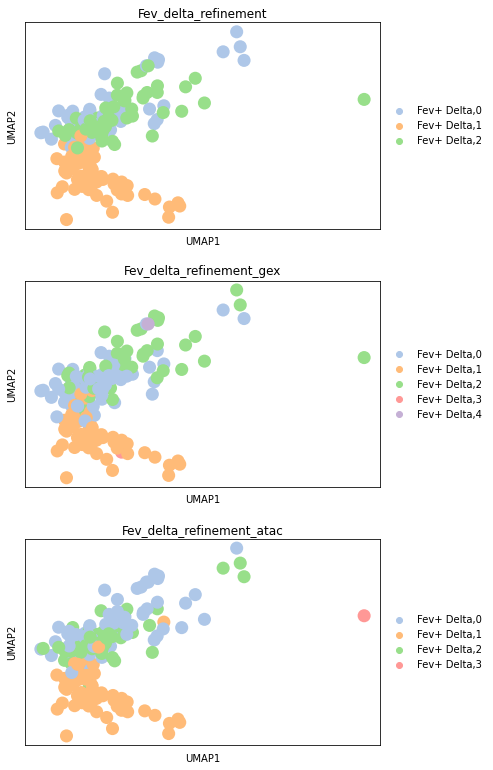

In [103]:
sc.pl.umap(adata, color=["Fev_delta_refinement", "Fev_delta_refinement_gex", "Fev_delta_refinement_atac"], ncols=1)

In [45]:
new_annotations.columns

Index(['Unnamed: 0', 'Fev_delta_refinement', 'Ngn3_high_refinement',
       'Fev_delta_refinement_gex', 'Ngn3_high_refinement_gex',
       'Fev_delta_refinement_atac', 'Ngn3_high_refinement_atac'],
      dtype='object')

In [30]:
sc.tl.rank_genes_groups(adata, groupby='Fev_delta_refinement')

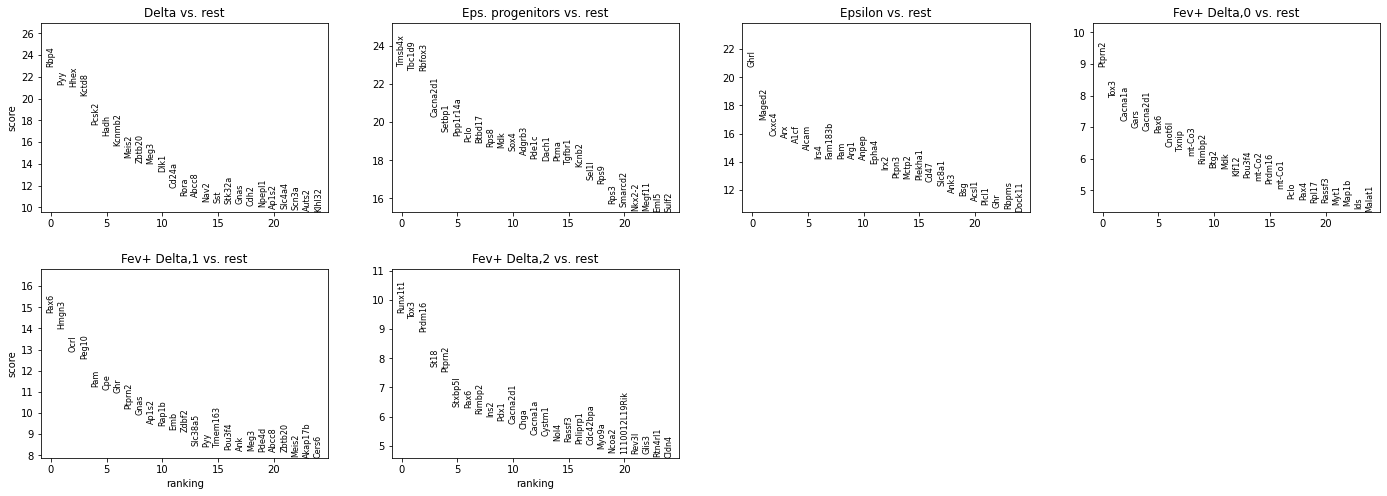

In [31]:
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

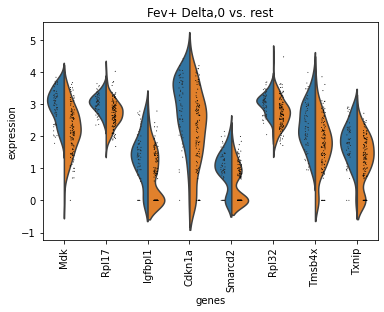

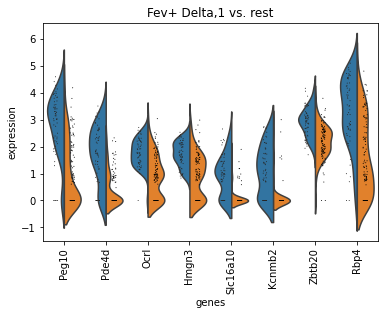

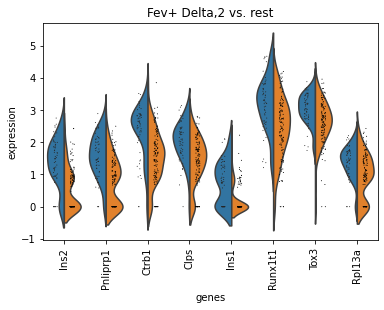

In [52]:
sc.pl.rank_genes_groups_violin(adata, groups=['Fev+ Delta,0', 'Fev+ Delta,1', 'Fev+ Delta,2'], n_genes=8)

In [66]:
adata_red = adata[~adata.obs['Fev_delta_refinement_gex'].isin(["Fev+ Delta,3", "Fev+ Delta,4"])].copy() # they only contain 1 cell

In [67]:
sc.tl.rank_genes_groups(adata_red, groupby='Fev_delta_refinement_gex')

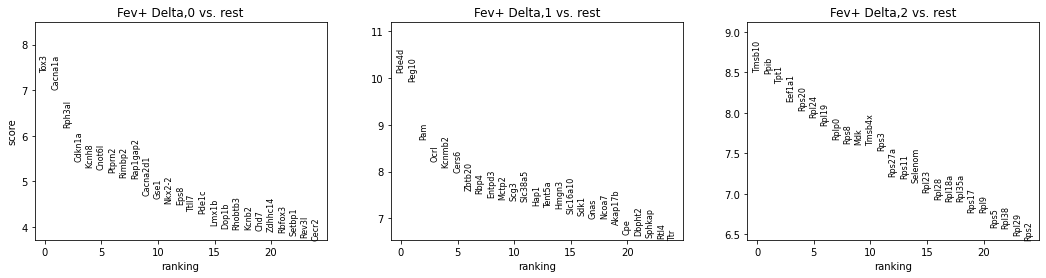

In [68]:
sc.pl.rank_genes_groups(adata_red, n_genes=25, sharey=False)

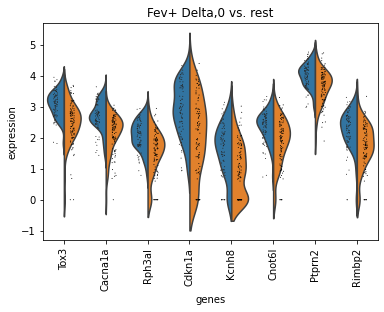

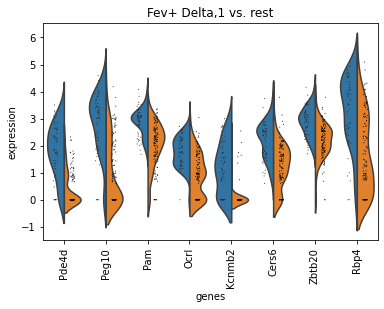

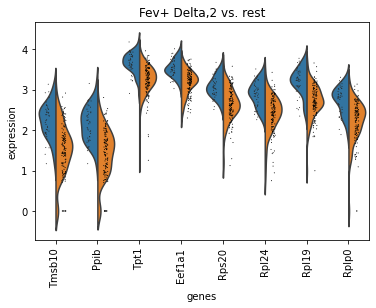

In [69]:
sc.pl.rank_genes_groups_violin(adata_red, groups=['Fev+ Delta,0', 'Fev+ Delta,1', 'Fev+ Delta,2'], n_genes=8)

In [72]:
adata_red = adata[~adata.obs['Fev_delta_refinement_atac'].isin(["Fev+ Delta,3"])].copy() # they only contain 1 cell

In [73]:
sc.tl.rank_genes_groups(adata_red, groupby='Fev_delta_refinement_atac')

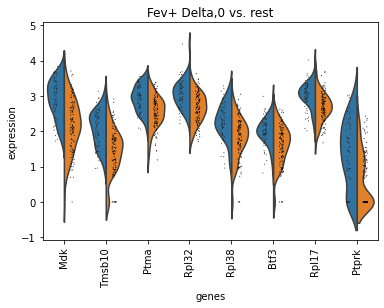

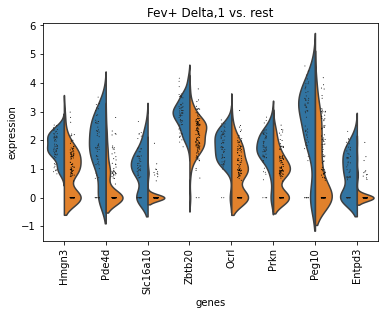

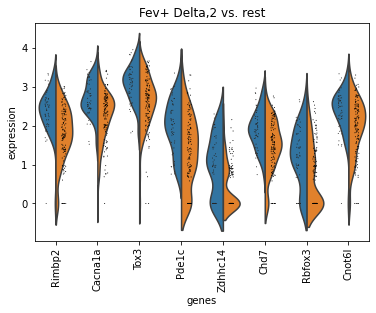

In [75]:
sc.pl.rank_genes_groups_violin(adata_red, n_genes=8)

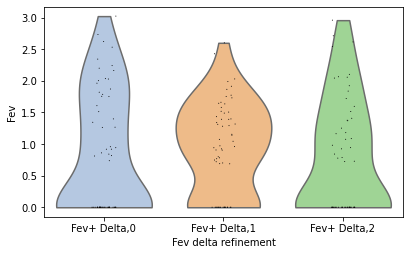

In [104]:
sc.pl.violin(adata, keys="Fev", groupby="Fev_delta_refinement")

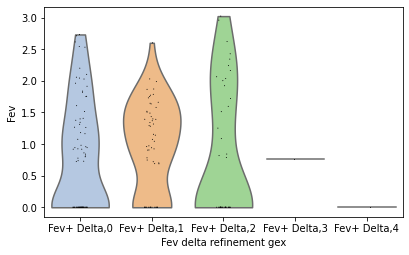

In [105]:
sc.pl.violin(adata, keys="Fev", groupby="Fev_delta_refinement_gex")

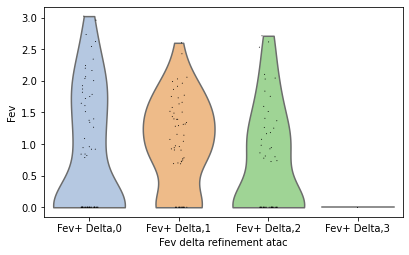

In [106]:
sc.pl.violin(adata, keys="Fev", groupby="Fev_delta_refinement_atac")